# Churn Prediction Model for Telecom Consumer Subcsriptions

#### Table of contents
* Data cleansing
* EDA
* Feature engineering
* Model iteration

### Load libraries and read in data

In [398]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [399]:
#read in the data
churn = pd.read_csv('./data.csv')

## Data Cleansing

In [400]:
### Rename columns

In [401]:
#rename columns
new_cols = ['customer_id','gender','is_senior_citizen','has_partner','has_dependents','tenure','has_phone_service','has_multiple_lines','has_internet_service','has_online_security', 'has_online_backup','has_device_protection','has_tech_support','has_streaming_tv','has_streaming_movies','contract','has_paperless_billing','payment_method','monthly_charges','total_charges','churned']
col_name_dict = dict(zip(list(churn.columns), new_cols))
churn.rename(columns=col_name_dict, inplace=True)

#check it worked by returning info
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customer_id              7043 non-null object
gender                   7043 non-null object
is_senior_citizen        7043 non-null int64
has_partner              7043 non-null object
has_dependents           7043 non-null object
tenure                   7043 non-null int64
has_phone_service        7043 non-null object
has_multiple_lines       7043 non-null object
has_internet_service     7043 non-null object
has_online_security      7043 non-null object
has_online_backup        7043 non-null object
has_device_protection    7043 non-null object
has_tech_support         7043 non-null object
has_streaming_tv         7043 non-null object
has_streaming_movies     7043 non-null object
contract                 7043 non-null object
has_paperless_billing    7043 non-null object
payment_method           7043 non-null object
monthly_charges          7043 non-null float64
total_charges       

In [402]:
### Count nulls in data

In [403]:
#count number of nulls in each field
churn.isnull().sum()

customer_id              0
gender                   0
is_senior_citizen        0
has_partner              0
has_dependents           0
tenure                   0
has_phone_service        0
has_multiple_lines       0
has_internet_service     0
has_online_security      0
has_online_backup        0
has_device_protection    0
has_tech_support         0
has_streaming_tv         0
has_streaming_movies     0
contract                 0
has_paperless_billing    0
payment_method           0
monthly_charges          0
total_charges            0
churned                  0
dtype: int64

In [404]:
#describe the data
churn.describe()

,is_senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Total charges is not a numerical field - why?

### Check for errors when converting total_charges to float

In [405]:
#find values that throw an exception when converting total_charges to float and store the index values in a list
exception_indices = []
for i, item in enumerate(churn.total_charges):
    try:
        float(item)
    except ValueError:
        print('ERROR at index {}: {!r}'.format(i, item))
        exception_indices.append(i)
exception_indices

ERROR at index 488: ' '
ERROR at index 753: ' '
ERROR at index 936: ' '
ERROR at index 1082: ' '
ERROR at index 1340: ' '
ERROR at index 3331: ' '
ERROR at index 3826: ' '
ERROR at index 4380: ' '
ERROR at index 5218: ' '
ERROR at index 6670: ' '
ERROR at index 6754: ' '


[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

#### Look at rows that threw exceptions

The nulls didn't show up when I checked for nulls because these are spaces.

In [406]:
#check all rows where total_charges threw an exception
churn.iloc[exception_indices]

,customer_id,gender,is_senior_citizen,has_partner,has_dependents,tenure,has_phone_service,has_multiple_lines,has_internet_service,has_online_security,...,has_device_protection,has_tech_support,has_streaming_tv,has_streaming_movies,contract,has_paperless_billing,payment_method,monthly_charges,total_charges,churned
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


All customers that threw an exception have a 0 length tenure (they have either not started their contract or have yet to be billed).

#### Remove rows that threw exceptions (0 tenure)

In [407]:
#remove these 11 rows
churn.drop(churn.index[exception_indices], inplace = True)

#### Check for remaining errors and convert total_charges to float

In [408]:
#iterate over total_charges again and store indices of errors
exception_indices = []
for i, item in enumerate(churn.total_charges):
    try:
        float(item)
    except ValueError:
        exception_indices.append(i)
        
#check if any errors were stored      
if len(exception_indices) == 0:
    print('No errors')
else:
    print('Still some errors')

No errors


In [409]:
#convert the total_charges column to float
churn['total_charges'] = pd.to_numeric(churn.total_charges)

### Factorize columns

In [410]:
#change "yes" to 1 and "no", "no internet service", and "no phone service" to 0 in all columns
churn.replace(to_replace = 'Yes', value = 1, inplace = True)
churn.replace(to_replace = 'No', value = 0, inplace = True)
churn.replace(to_replace = 'No phone service', value = 0, inplace = True)
churn.replace(to_replace = 'No internet service', value = 0, inplace = True)

In [411]:
#rename gender to is_male and convert it to a binary variable
churn.rename(columns={'gender':'is_male'}, inplace=True)
churn['is_male'].replace(to_replace = 'Male', value = 1, inplace = True)
churn['is_male'].replace(to_replace = 'Female', value = 0, inplace = True)

In [412]:
churn.head()

,customer_id,is_male,is_senior_citizen,has_partner,has_dependents,tenure,has_phone_service,has_multiple_lines,has_internet_service,has_online_security,...,has_device_protection,has_tech_support,has_streaming_tv,has_streaming_movies,contract,has_paperless_billing,payment_method,monthly_charges,total_charges,churned
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


#### Drop customer_id column

In [413]:
#drop the customer_id column
churn = churn.iloc[:,1:]

In [414]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
is_male                  7032 non-null int64
is_senior_citizen        7032 non-null int64
has_partner              7032 non-null int64
has_dependents           7032 non-null int64
tenure                   7032 non-null int64
has_phone_service        7032 non-null int64
has_multiple_lines       7032 non-null int64
has_internet_service     7032 non-null object
has_online_security      7032 non-null int64
has_online_backup        7032 non-null int64
has_device_protection    7032 non-null int64
has_tech_support         7032 non-null int64
has_streaming_tv         7032 non-null int64
has_streaming_movies     7032 non-null int64
contract                 7032 non-null object
has_paperless_billing    7032 non-null int64
payment_method           7032 non-null object
monthly_charges          7032 non-null float64
total_charges            7032 non-null float64
churned                  7032 n

## Feature engineering

### Store sets of pre-dummy fields

In [415]:
#store these payment_method categories in a list to use as reference after dummies created
payment_method_types = set(churn.payment_method)

In [416]:
#store these contract categories in a list to use as reference after dummies created
contract_types = set(churn.contract)

### Convert has_internet_service, contract, and payment_method to dummy variables

In [417]:
#convert the three fields to dummy variables
churn = pd.get_dummies(churn, columns=['has_internet_service', 'contract', 'payment_method'], drop_first=True)

In [418]:
#fix the names of these new dummy columns
churn.rename(columns={'has_internet_service_DSL':'has_dsl','has_internet_service_Fiber optic':'has_fiber', 'contract_One year':'contract_one_yr','contract_Two year':'contract_two_yr', 'payment_method_Credit card (automatic)':'payment_method_credit','payment_method_Electronic check':'payment_method_echeck', 'payment_method_Mailed check':'payment_method_mail'}, inplace=True)

### Create num_products fields to count the number of products each customer has

In [419]:
#define product columns
product_columns = ['has_phone_service', 'has_online_security','has_online_backup','has_device_protection','has_tech_support','has_streaming_tv','has_streaming_movies','has_dsl','has_fiber']
#create a column to count the number of products a customer has
churn['num_products'] = churn[product_columns].sum(axis=1)

### Inspect new dataframe

In [420]:
#look at dataframe info with new columns
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
is_male                  7032 non-null int64
is_senior_citizen        7032 non-null int64
has_partner              7032 non-null int64
has_dependents           7032 non-null int64
tenure                   7032 non-null int64
has_phone_service        7032 non-null int64
has_multiple_lines       7032 non-null int64
has_online_security      7032 non-null int64
has_online_backup        7032 non-null int64
has_device_protection    7032 non-null int64
has_tech_support         7032 non-null int64
has_streaming_tv         7032 non-null int64
has_streaming_movies     7032 non-null int64
has_paperless_billing    7032 non-null int64
monthly_charges          7032 non-null float64
total_charges            7032 non-null float64
churned                  7032 non-null int64
has_dsl                  7032 non-null uint8
has_fiber                7032 non-null uint8
contract_one_yr          7032 non-

## Exploratory Data Analysis

### Graph frequncy of every binary column

#### Produce a list of binary columns

In [421]:
#produce a list of columns that are binary
binary_cols = []
for i in churn.columns:
    if len(set(churn[i])) == 2:
        binary_cols.append(i)
churn_binary_cols = churn[binary_cols]
print(binary_cols)
print('Number of binary columns: ' + str(len(binary_cols)))

['is_male', 'is_senior_citizen', 'has_partner', 'has_dependents', 'has_phone_service', 'has_multiple_lines', 'has_online_security', 'has_online_backup', 'has_device_protection', 'has_tech_support', 'has_streaming_tv', 'has_streaming_movies', 'has_paperless_billing', 'churned', 'has_dsl', 'has_fiber', 'contract_one_yr', 'contract_two_yr', 'payment_method_credit', 'payment_method_echeck', 'payment_method_mail']
Number of binary columns: 21


#### Graph a histogram of every binary variable

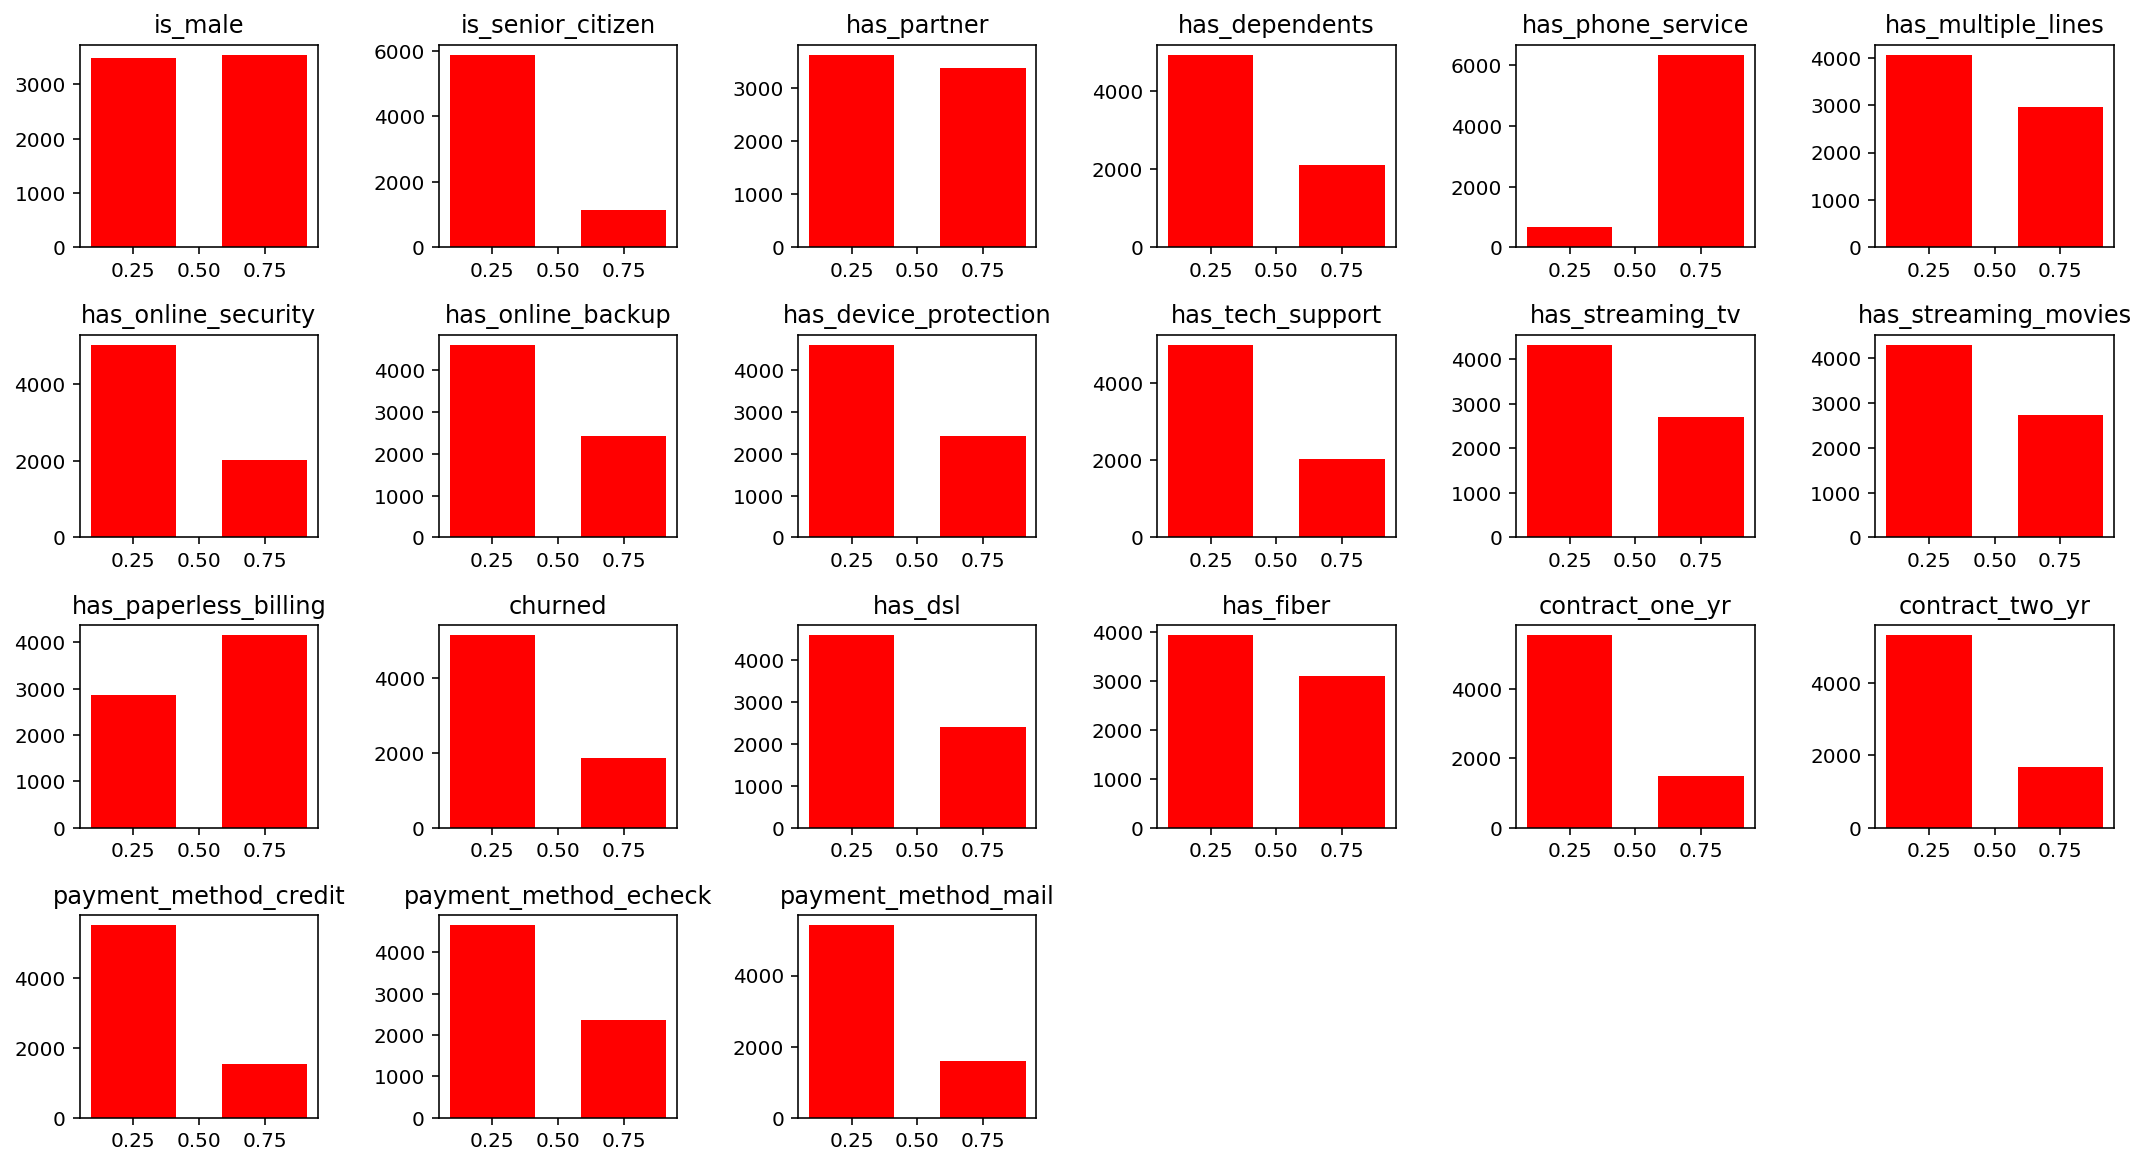

In [422]:
#loop over all columns, produce histogram and print in a subplot
fig = plt.figure(figsize=(15,12))
#loop over all columns
for i in range(0, churn_binary_cols.shape[1]):
    plt.subplot(6,6,i+1)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(True)
    f.set_title(churn_binary_cols.columns.values[i])
    
    plt.hist(churn_binary_cols.iloc[:, i], bins = 2, color='red', rwidth=0.65)

plt.tight_layout()

In [423]:
#return proportions of True for each binary column
binary_props = []
for x in binary_cols:
    pct = round(churn[x].sum()/len(churn[x]),3)
    binary_props.append([x,pct])
binary_props

[['is_male', 0.505],
 ['is_senior_citizen', 0.162],
 ['has_partner', 0.483],
 ['has_dependents', 0.298],
 ['has_phone_service', 0.903],
 ['has_multiple_lines', 0.422],
 ['has_online_security', 0.287],
 ['has_online_backup', 0.345],
 ['has_device_protection', 0.344],
 ['has_tech_support', 0.29],
 ['has_streaming_tv', 0.384],
 ['has_streaming_movies', 0.388],
 ['has_paperless_billing', 0.593],
 ['churned', 0.266],
 ['has_dsl', 0.344],
 ['has_fiber', 0.44],
 ['contract_one_yr', 0.209],
 ['contract_two_yr', 0.24],
 ['payment_method_credit', 0.216],
 ['payment_method_echeck', 0.336],
 ['payment_method_mail', 0.228]]

### Plot histograms of tenure and monthly charges

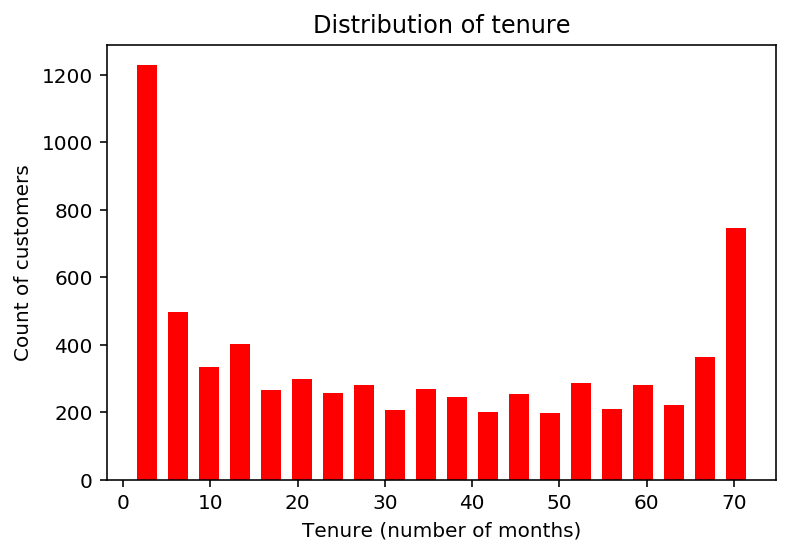

In [424]:
#plot a histogram of tenure
plt.hist(churn.tenure, bins = 20, color='red', rwidth = 0.65)
plt.xlabel('Tenure (number of months)')
plt.ylabel('Count of customers')
plt.title('Distribution of tenure')
plt.show()

This looks like a beta distribution, but I'm not sure how to normalize it. I might still get some insights from modelling with this. I can revisit normailzaing this later.

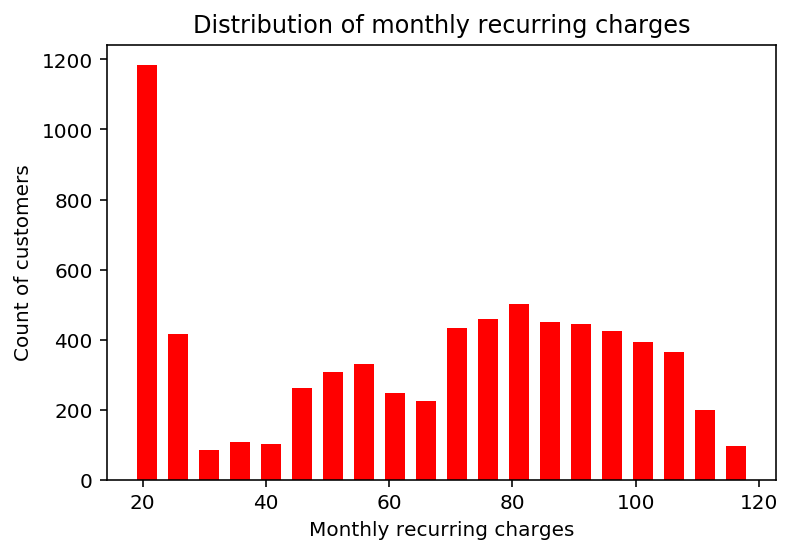

In [425]:
#plot a histogram of monthly charges
plt.hist(churn.monthly_charges, bins = 20, color='red', rwidth=0.65)
plt.xlabel('Monthly recurring charges')
plt.ylabel('Count of customers')
plt.title('Distribution of monthly recurring charges')
plt.show();

Not sure what this distribution would be called, but looks normal for charges above about $26

### Distribution of number of products per customer

In [426]:
freq_prods_per_cust = pd.DataFrame(churn.num_products.value_counts().sort_index())

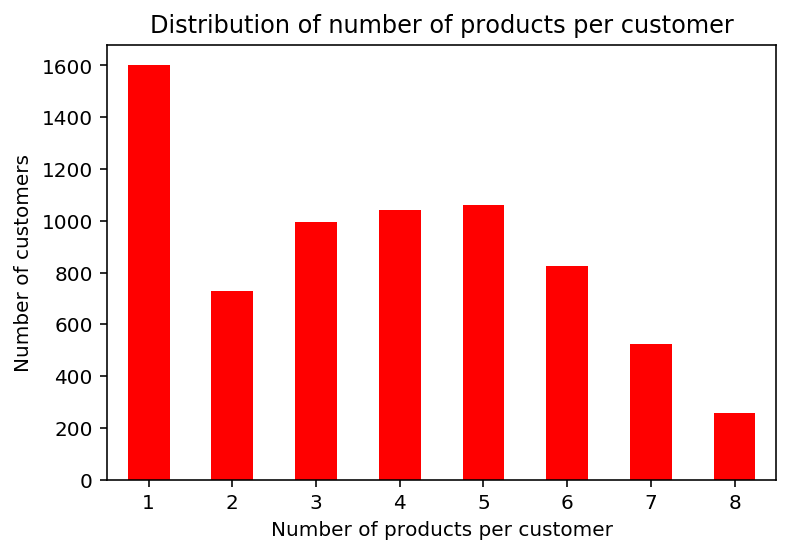

In [427]:
#plot a bar graph with a distribution of the number of products per customer
freq_prods_per_cust = pd.DataFrame(churn.num_products.value_counts().sort_index())
freq_prods_per_cust.plot(kind='bar', legend = False, color='red')
plt.xlabel('Number of products per customer')
plt.ylabel('Number of customers')
plt.title('Distribution of number of products per customer')
plt.xticks(rotation=0)

plt.show()

### Distribution of number of products per churner

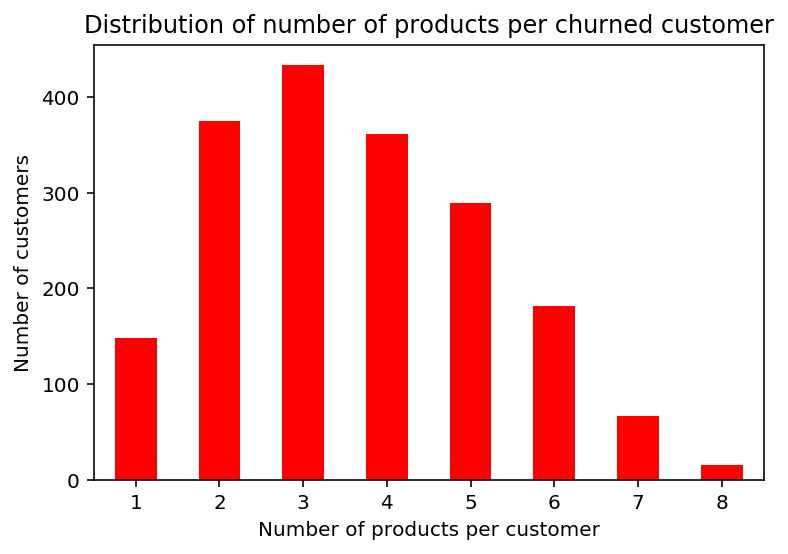

In [428]:
#plot a bar graph with a distribution of the number of products per churner
freq_prods_per_cust = pd.DataFrame(churn[churn.churned==1].num_products.value_counts().sort_index())
freq_prods_per_cust.plot(kind='bar', legend = False, color='red')
plt.xlabel('Number of products per customer')
plt.ylabel('Number of customers')
plt.title('Distribution of number of products per churned customer')
plt.xticks(rotation=0)

plt.show()

Conclude two things:
* A lot of customers only have 1 product - not good for retention
* Most churners had between 2 and 5 products incusively

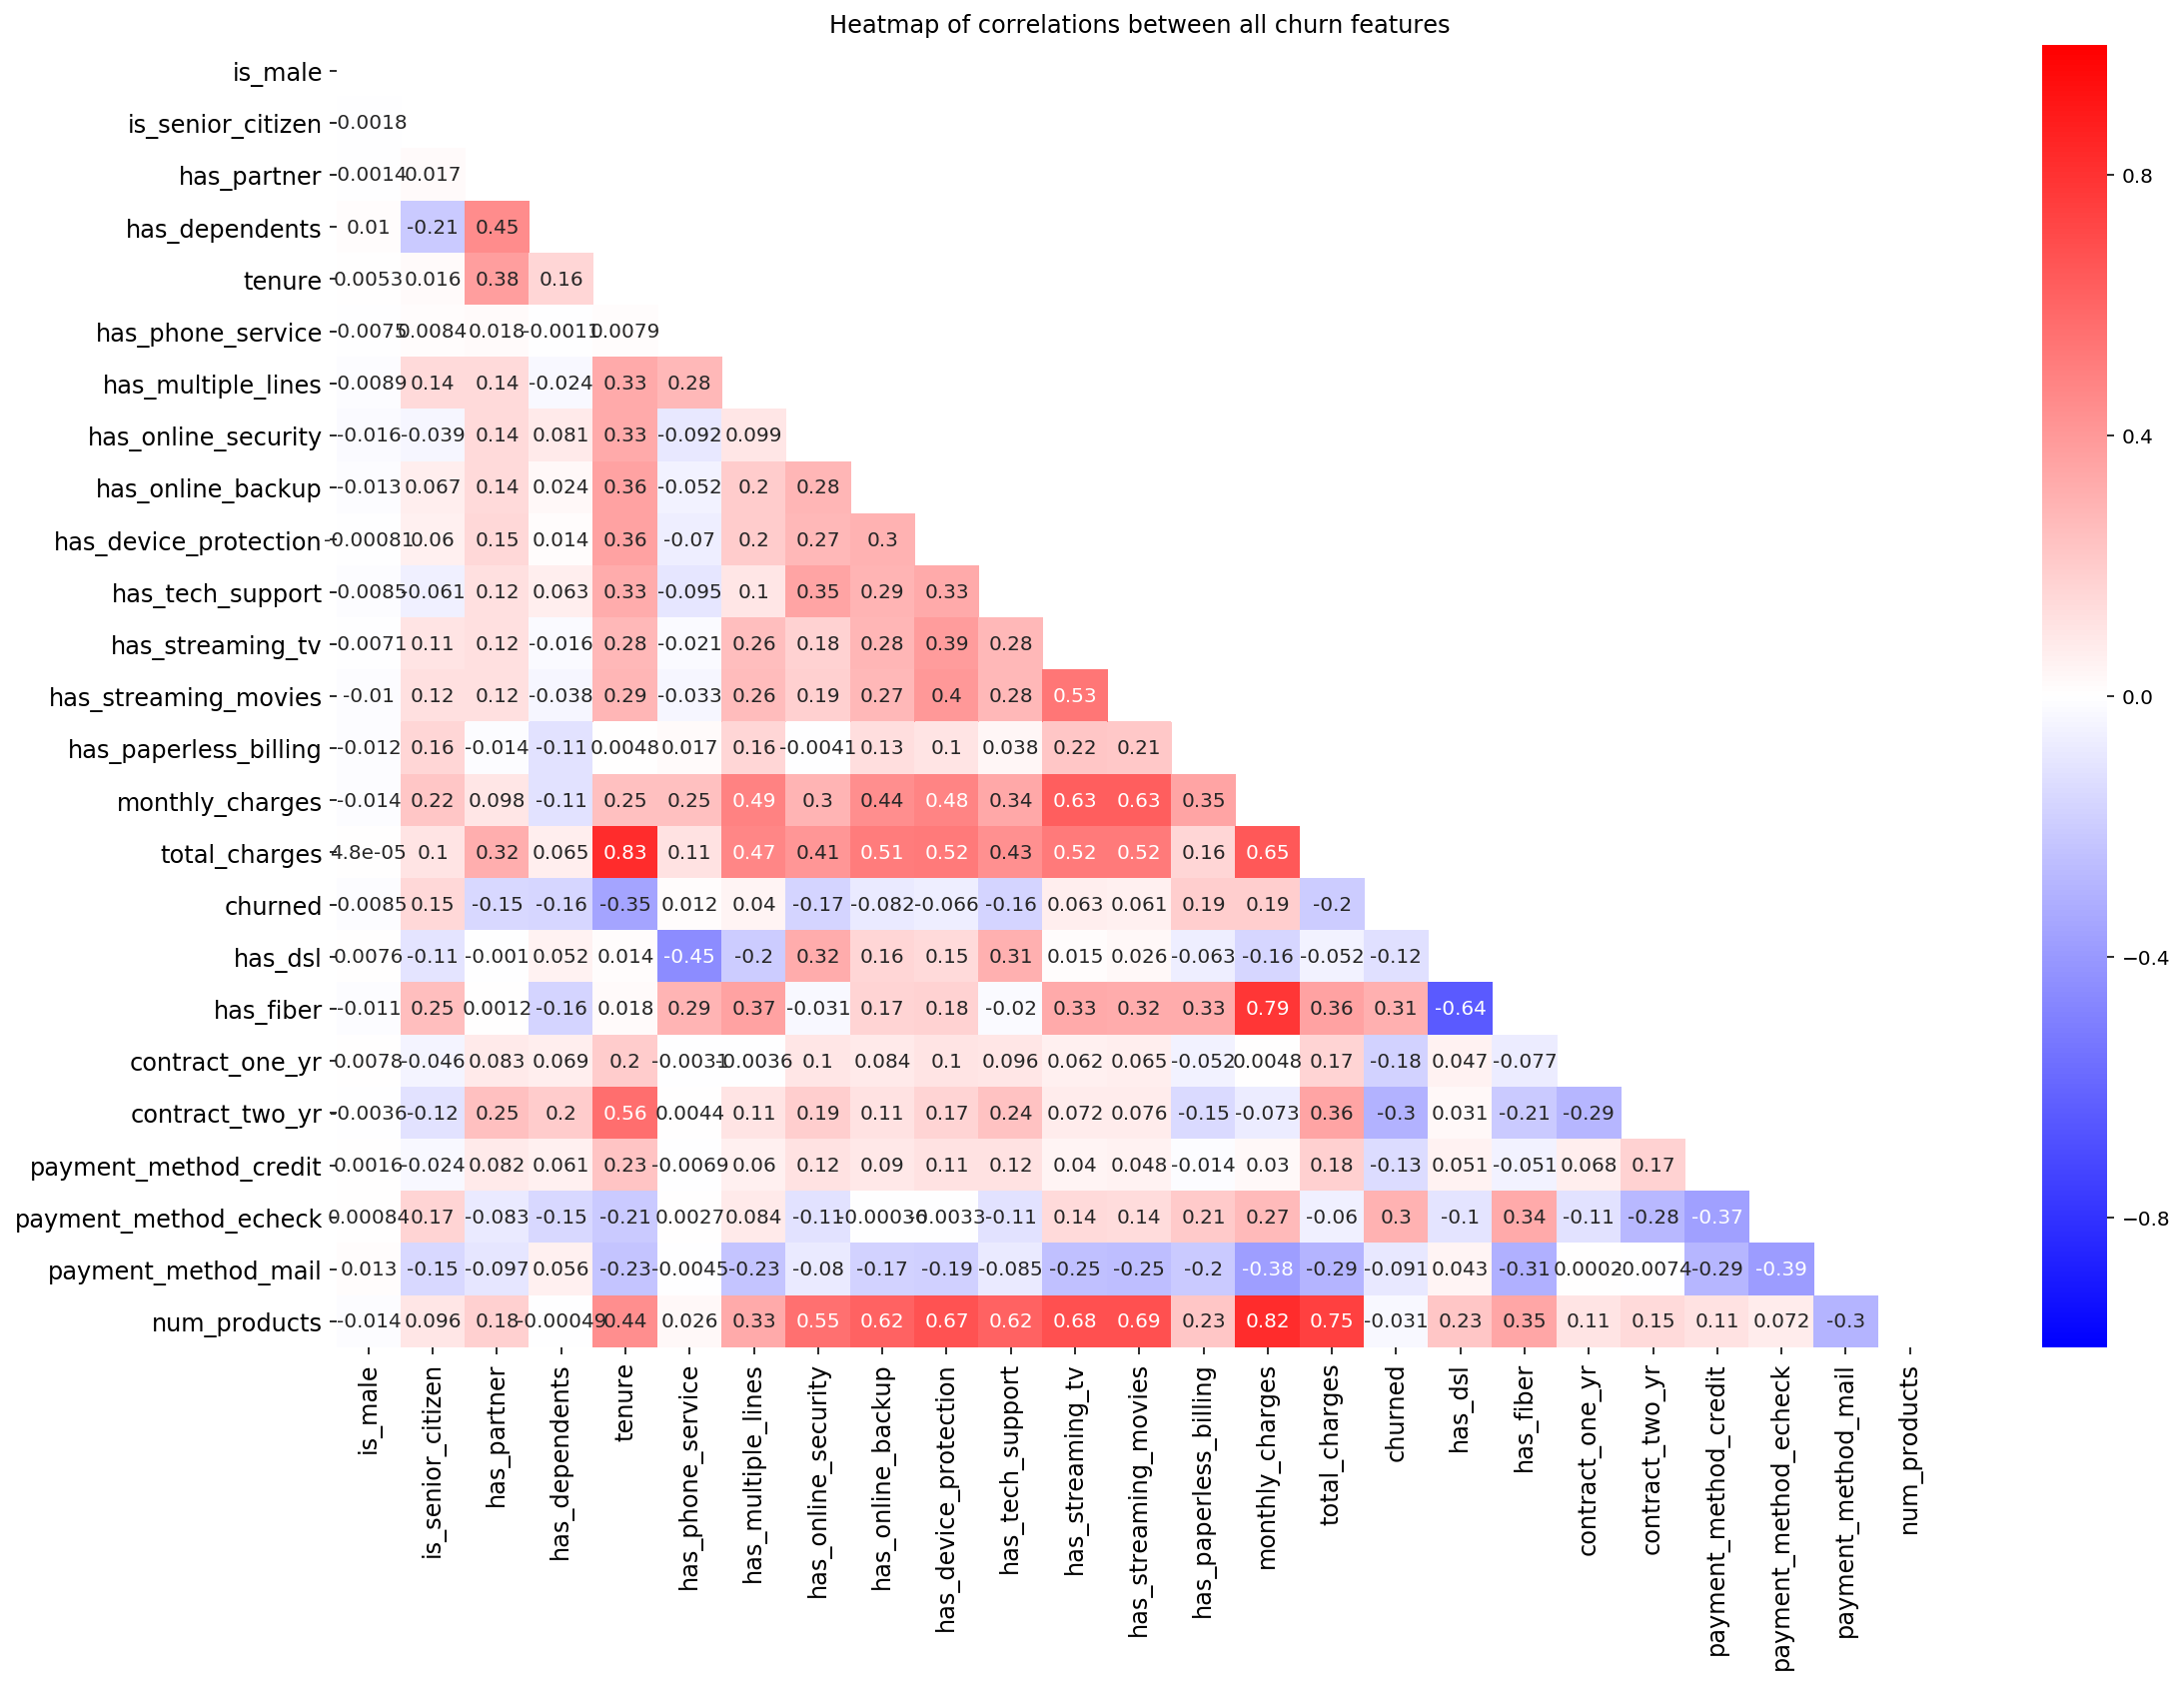

In [429]:
#create a heatmap to show correlation between all variables

corr = churn.corr()
fig, ax = plt.subplots(figsize=(18,12))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, cmap='bwr', annot = True, vmin=-1, vmax=1)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)
plt.title('Heatmap of correlations between all churn features')
plt.show()

#### Findings
* Based on the heatmap, the most signifcant variables that determine churn are: tenure, has_fiber, contract_two_yr, payment_method_echeck.
* Surprisingly, the number of products doesn't initially seem to be significant
* num_products is highly correlated with the product cateogries which makes sense - I will remove this
* total_charges and tenure highly correlated (cumulative charge increases with tenure)
* contract two yr and tenure correlated (longer contracts = longer tenure)
* monthly charges and has fiber is highly correlated (0.79) - probably a more expensive product


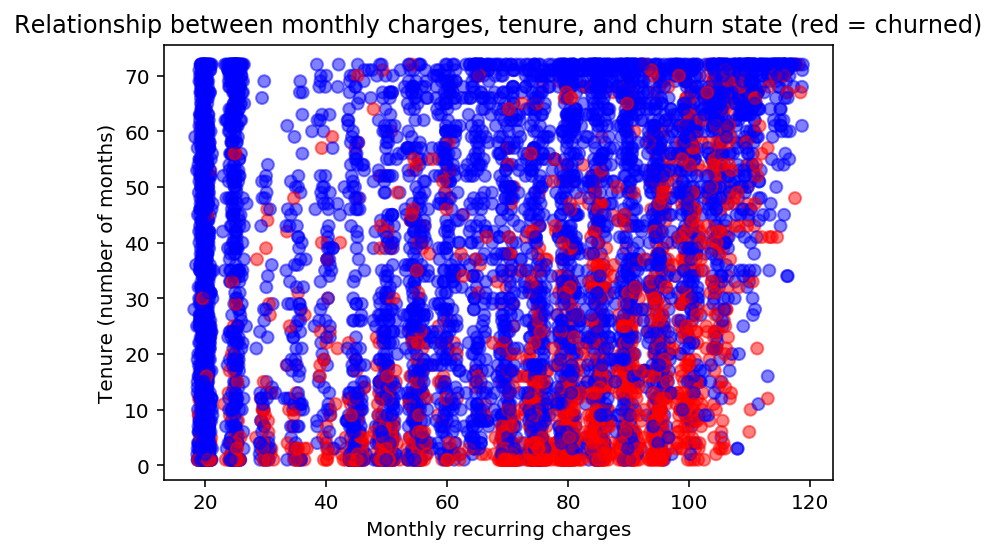

In [430]:
#scatter plot of tenure vs. monthly charges with churners coloured
plt.scatter(x=churn.monthly_charges, y=churn.tenure, c=churn.churned, alpha=0.5, cmap='bwr')
plt.xlabel('Monthly recurring charges')
plt.ylabel('Tenure (number of months)')
plt.title('Relationship between monthly charges, tenure, and churn state (red = churned)')
plt.show()

## Modelling

### KNN classifier
#### Pros: 
* My data might have irregular boundaries so I want to use a non-parametric model to estimate groups
* My data might have a euclidean pattern

#### Cons:
* KNN classifier is susceptible to feature irrelevance
* KNN is sensitve to the scale of the data

### Decision tree
#### Pros:
* Decision trees are also non-parametric
* Decision tree are not impacted by feature irrelevance (so I don't have to pay as much attention to feature selection)

#### Cons:
* They don't work well if classes are highly unbalanced (in my case, a few are)
* Special attention needs to be paid to tuning to avoid overfitting the data
* Recursive binary splitting means solutions are not guaranteed to be globally optimal


### Random Forest
#### Pros:
* Performance is comparable with the best supervised learning models
* You don't need a train-test-split structure
* They are more accurate

#### Cons:
* They are slow



## Create global feature and target 
#### Drop total charges since highly correlated with monthly charges and tenure

In [431]:
#create features and response variable to use in all models
X = churn.drop(columns = ['churned','total_charges','is_male', 'num_products'])
y = churn.churned

## Hierarchical Clustering

In [432]:
#Scale X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [433]:
#import and run model on different values of n_clusters
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
hier_scores=[]
for x in range(2,10):
    agg = AgglomerativeClustering(n_clusters=x)
    agg.fit(X_scaled)
    labels = agg.labels_
    sil = metrics.silhouette_score(X, labels, metric='euclidean')
    hier_scores.append([x,round(sil,3)])
hier_scores

[[2, 0.371],
 [3, 0.25],
 [4, 0.155],
 [5, 0.095],
 [6, 0.039],
 [7, 0.042],
 [8, 0.022],
 [9, -0.02]]

#### 2 clusters produces the best silhouette score for hierarchical clustering

In [434]:
#run for n_clusters=2
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_scaled)
labels = agg.labels_
churn['cluster_h'] = agg.labels_

In [435]:
# Save the cluster labels and sort by cluster.
churn.cluster_h.value_counts()

0    3554
1    3478
Name: cluster_h, dtype: int64

## DBSCAN Clustering

In [436]:
#import and run model on different values of eps and min_samples to return best silhouette score
from sklearn.cluster import DBSCAN
from sklearn import metrics
db_scores=[]
for eps in range(2,8):
    for min_samples in range(2,20,2):
        from sklearn.cluster import DBSCAN
        db = DBSCAN(eps=eps/2, min_samples=min_samples)
        db.fit(X_scaled)
        labels = db.labels_
        sil = metrics.silhouette_score(X, labels, metric='euclidean')
        db_scores.append([eps,min_samples,round(sil,3)])
db_scores

[[2, 2, -0.702],
 [2, 4, -0.648],
 [2, 6, -0.612],
 [2, 8, -0.592],
 [2, 10, -0.593],
 [2, 12, -0.591],
 [2, 14, -0.429],
 [2, 16, -0.436],
 [2, 18, -0.434],
 [3, 2, -0.704],
 [3, 4, -0.644],
 [3, 6, -0.608],
 [3, 8, -0.583],
 [3, 10, -0.583],
 [3, 12, -0.587],
 [3, 14, -0.423],
 [3, 16, -0.432],
 [3, 18, -0.429],
 [4, 2, -0.703],
 [4, 4, -0.642],
 [4, 6, -0.606],
 [4, 8, -0.583],
 [4, 10, -0.583],
 [4, 12, -0.587],
 [4, 14, -0.423],
 [4, 16, -0.432],
 [4, 18, -0.429],
 [5, 2, -0.724],
 [5, 4, -0.575],
 [5, 6, -0.502],
 [5, 8, -0.405],
 [5, 10, -0.305],
 [5, 12, -0.269],
 [5, 14, -0.253],
 [5, 16, -0.229],
 [5, 18, -0.213],
 [6, 2, -0.71],
 [6, 4, -0.56],
 [6, 6, -0.506],
 [6, 8, -0.426],
 [6, 10, -0.403],
 [6, 12, -0.238],
 [6, 14, -0.343],
 [6, 16, -0.251],
 [6, 18, -0.249],
 [7, 2, -0.532],
 [7, 4, -0.102],
 [7, 6, -0.088],
 [7, 8, -0.09],
 [7, 10, -0.1],
 [7, 12, -0.216],
 [7, 14, -0.102],
 [7, 16, -0.217],
 [7, 18, -0.085]]

#### Findings:
* DBSCAN worse than hierarchical clustering
* Based on silhouette scores, I'll use the hierarchical clustering labels for 2 clusters as a new feature

### Recreate X with new cluster_h column - now have 22 features

In [437]:
#recreate X to capture cluster_h
X = churn.drop(columns = ['churned','total_charges','is_male', 'num_products'])

## KNN modelling with cross validation (k-folds = 10)

### Import libraries

In [438]:
#import libraries for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier
from sklearn import metrics

### Run the KNN classifier for all values of k between 1 and 200 inclusively

In [439]:
#instantiate the k-folds model selection with a fixed 10 splits and maintain reproducibility
kf = KFold(n_splits=10, shuffle=False)
#create object to hold the models accuracies for each value of k
mean_cv_score = []
#iterate a KNN model for number of neighbours up to and including 200
for k in range(1,201):
    knn = KNeighborsClassifier(n_neighbors=k) #instantiate model with given k
    cv_score = cross_val_score(knn, 
                               X, 
                               y, 
                               cv=kf) #store the accuracy score for the model
    mean_cv_score.append([k, np.mean(cv_score)]) #append the k value and the mean accuracies to a list
mean_knn_score = pd.DataFrame(mean_cv_score) #convert it to a dataframe
mean_knn_score.columns = ['k', 'accuracy'] #rename the columns of the dataframe

#### Run the DummyClassifier

In [440]:
#create object to hold the models accuracies for each value of k
mean_cv_score = []
#iterate a KNN model for number of neighbours up to and including 200

dc = DummyClassifier(strategy='most_frequent', random_state=0) #instantiate dummy model
cv_score_dummy = cross_val_score(dc, 
                                 X, 
                                 y, 
                                 cv=kf) #store the accuracy score for the model
mean_dummy_score = np.mean(cv_score_dummy)
print('Mean dummy score (most-frequent): ' + str(round(mean_dummy_score,3)))

Mean dummy score (most-frequent): 0.734


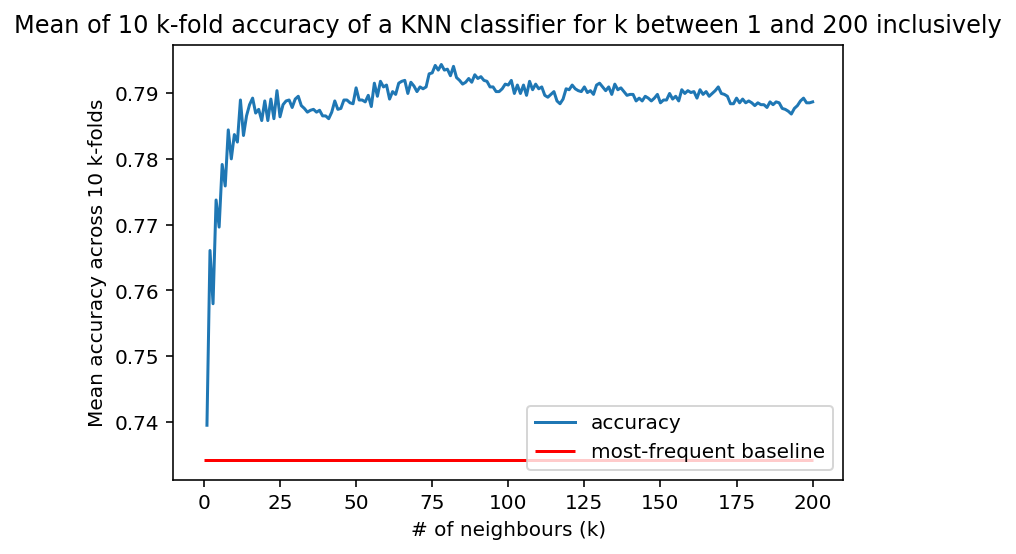

In [441]:
#plot the mean accuracies against k
plt.plot(mean_knn_score.k, mean_knn_score.accuracy)
plt.hlines(mean_dummy_score, xmin = 0, xmax = 200, colors='r', label='most-frequent baseline')
plt.title('Mean of 10 k-fold accuracy of a KNN classifier for k between 1 and 200 inclusively')
plt.xlabel("# of neighbours (k)")
plt.ylabel('Mean accuracy across 10 k-folds')
plt.legend()
plt.gcf().set_size_inches(6, 4)
plt.show();

In [442]:
#return the best k (highest accuracy)
print('Best k: ' + str(mean_knn_score['accuracy'].idxmax()+1))
print('Accuracy: ' + str(round(mean_knn_score.accuracy[mean_knn_score['accuracy'].idxmax()],3)))

Best k: 78
Accuracy: 0.794


### Standardize the data and run again using sklearn.pipeline

In [443]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

#instantiate the k-folds model selection with a fixed 10 splits and maintain reproducibility
kf = KFold(n_splits=10, shuffle=False)
#create object to hold the models accuracies for each value of k
mean_cv_score_standard = []

#iterate a KNN model for number of neighbours up to and including 200
for k in range(1,201):
    knn = KNeighborsClassifier(n_neighbors=k) #instantiate model with given k
    pipeline = Pipeline([('transformer', scaler), ('estimator', knn)]) #use pipeline to standardize each train split
    cv_score_standard = cross_val_score(pipeline, 
                               X, 
                               y, 
                               cv=kf) #store the accuracy score for the model
    mean_cv_score_standard.append([k, np.mean(cv_score_standard)]) #append the k value and the mean accuracies to a list
    
mean_knn_score_standard = pd.DataFrame(mean_cv_score_standard) #convert it to a dataframe
mean_knn_score_standard.columns = ['k', 'accuracy'] #rename the columns of the dataframe

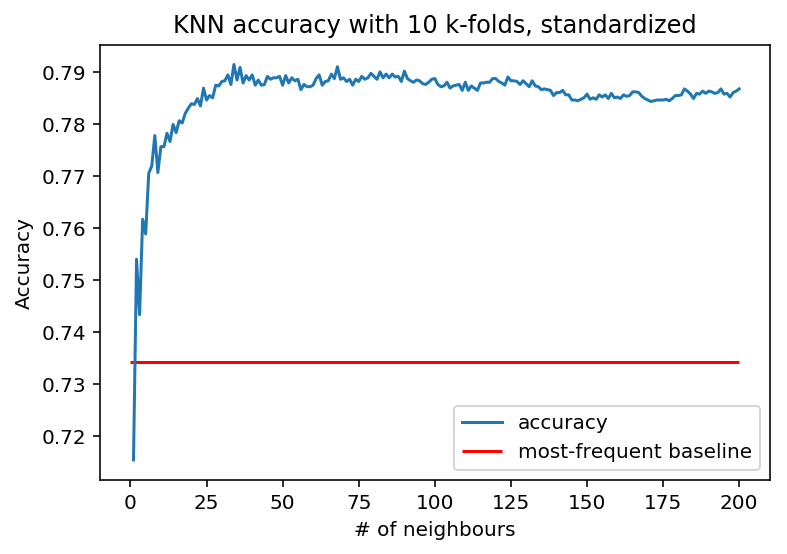

In [444]:
#plot the mean accuracies against k
plt.plot(mean_knn_score_standard.k, mean_knn_score_standard.accuracy)
plt.hlines(mean_dummy_score, xmin = 0, xmax = 200, colors='r', label='most-frequent baseline')
plt.title('KNN accuracy with 10 k-folds, standardized')
plt.xlabel('# of neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.gcf().set_size_inches(6,4)
plt.show();

In [445]:
#return the best k (highest accuracy)
print('Best k: ' + str(mean_knn_score_standard['accuracy'].idxmax()+1))
print('Accuracy: ' + str(round(mean_knn_score_standard.accuracy[mean_knn_score_standard['accuracy'].idxmax()],3)))

Best k: 34
Accuracy: 0.791


#### Only 5.7% better than the most-frequent dummy classifier

### Run KNN for monthly charges > 26

In [447]:
churn_over_22_monthly = churn[(churn.monthly_charges>26)]
X_filtered = churn_filtered.drop(columns = ['churned','total_charges','is_male', 'num_products'])
y_filtered = churn_filtered.churned

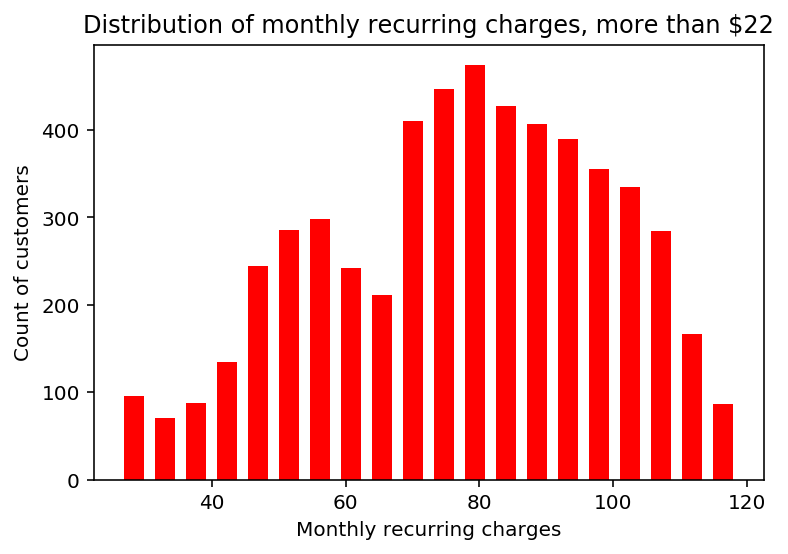

In [448]:
#plot a histogram of monthly charges
plt.hist(churn_over_22_monthly.monthly_charges, bins = 20, color='red', rwidth=0.65)
plt.xlabel('Monthly recurring charges')
plt.ylabel('Count of customers')
plt.title('Distribution of monthly recurring charges, more than $22')
plt.show();

In [449]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

#instantiate the k-folds model selection with a fixed 10 splits and maintain reproducibility
kf = KFold(n_splits=10, shuffle=False)
#create object to hold the models accuracies for each value of k
mean_cv_score_standard = []

#iterate a KNN model for number of neighbours up to and including 200
for k in range(1,201):
    knn = KNeighborsClassifier(n_neighbors=k) #instantiate model with given k
    pipeline = Pipeline([('transformer', scaler), ('estimator', knn)]) #use pipeline to standardize each train split
    cv_score_standard = cross_val_score(pipeline, 
                               X_filtered, 
                               y_filtered, 
                               cv=kf) #store the accuracy score for the model
    mean_cv_score_standard.append([k, np.mean(cv_score_standard)]) #append the k value and the mean accuracies to a list
    
mean_knn_score_standard = pd.DataFrame(mean_cv_score_standard) #convert it to a dataframe
mean_knn_score_standard.columns = ['k', 'accuracy'] #rename the columns of the dataframe

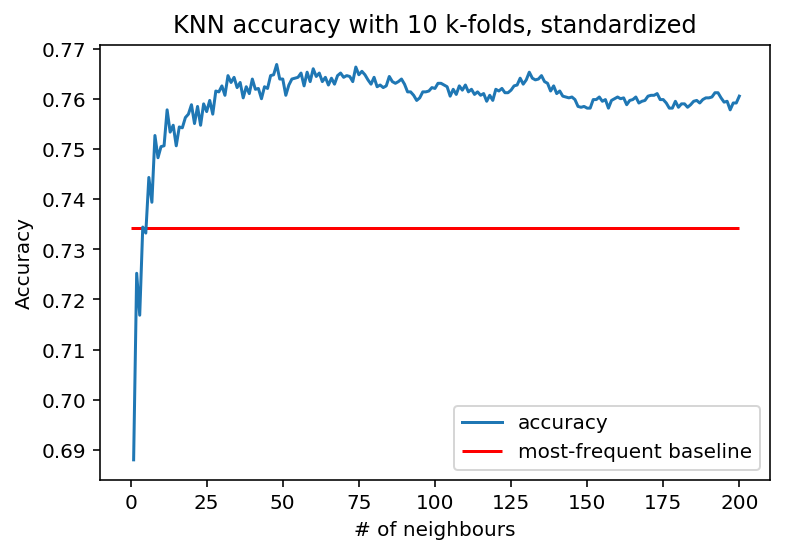

In [450]:
#plot the mean accuracies against k
plt.plot(mean_knn_score_standard.k, mean_knn_score_standard.accuracy)
plt.hlines(mean_dummy_score, xmin = 0, xmax = 200, colors='r', label='most-frequent baseline')
plt.title('KNN accuracy with 10 k-folds, standardized')
plt.xlabel('# of neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.gcf().set_size_inches(6,4)
plt.show();

In [451]:
#return the best k (highest accuracy)
print('Best k: ' + str(mean_knn_score_standard['accuracy'].idxmax()+1))
print('Accuracy: ' + str(round(mean_knn_score_standard.accuracy[mean_knn_score_standard['accuracy'].idxmax()],3)))

Best k: 48
Accuracy: 0.767


#### Accuracy worsens if I remove customers spending less than 26 dollars a month. 

### Select only a few features for KNN and run again using standardization
* tenure
* has_fiber 
* contract_two_yr
* payment_method_echeck

In [319]:
knn_features = X[['tenure', 'has_fiber', 'contract_two_yr', 'payment_method_echeck']]

### Run KNN using four features and standardization

In [320]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

#instantiate the k-folds model selection with a fixed 10 splits and maintain reproducibility
kf = KFold(n_splits=10, shuffle=False)
#create object to hold the models accuracies for each value of k
mean_cv_score_standard = []

#iterate a KNN model for number of neighbours up to and including 200
for k in range(1,201):
    knn = KNeighborsClassifier(n_neighbors=k) #instantiate model with given k
    pipeline = Pipeline([('transformer', scaler), ('estimator', knn)]) #use pipeline to standardize each train split
    cv_score_standard = cross_val_score(pipeline, 
                               knn_features, 
                               y, 
                               cv=kf) #store the accuracy score for the model
    mean_cv_score_standard.append([k, np.mean(cv_score_standard)]) #append the k value and the mean accuracies to a list
    
mean_knn_score_standard = pd.DataFrame(mean_cv_score_standard) #convert it to a dataframe
mean_knn_score_standard.columns = ['k', 'accuracy'] #rename the columns of the dataframe

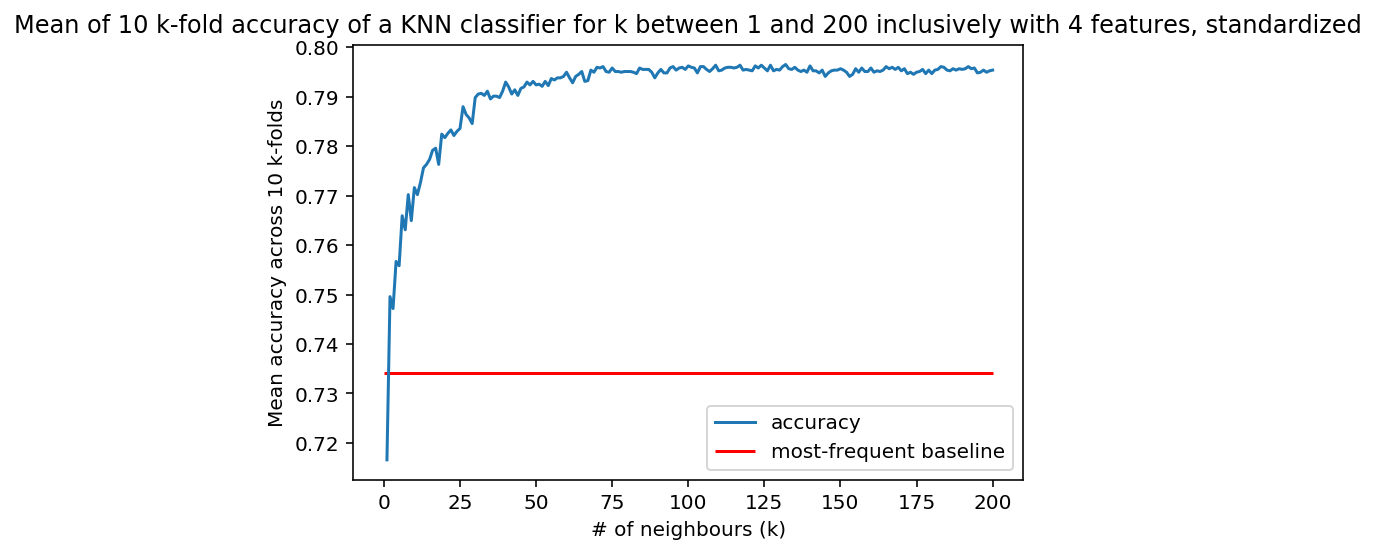

In [321]:
#plot the mean accuracies against k
plt.plot(mean_knn_score_standard.k, mean_knn_score_standard.accuracy)
plt.hlines(mean_dummy_score, xmin = 0, xmax = 200, colors='r', label='most-frequent baseline')
plt.title('Mean of 10 k-fold accuracy of a KNN classifier for k between 1 and 200 inclusively with 4 features, standardized')
plt.xlabel('# of neighbours (k)')
plt.ylabel('Mean accuracy across 10 k-folds')
plt.legend()
plt.gcf().set_size_inches(6, 4)
plt.show();

In [322]:
#return the best k (highest accuracy)
print('Best k: ' + str(mean_knn_score_standard['accuracy'].idxmax()+1))
print('Accuracy: ' + str(round(mean_knn_score_standard.accuracy[mean_knn_score_standard['accuracy'].idxmax()],3)))

Best k: 132
Accuracy: 0.796


#### Score is not different than with all features

## Decision tree over different values of depth, min_samples_leaf, min_samples_split

In [331]:
#import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#store the importance lists
#importance = []
#store gini scores
mean_score = []
#instantiate the k-folds model selection with a fixed 10 splits and maintain reproducibility
kf = KFold(n_splits=10, shuffle=False)
#run the decision tree model on all data and produce a graphviz
for depth in range(1,4):
    for min_samples_leaf in range(1,11):
        for min_samples_split in range(2,11):
            treeclass = DecisionTreeClassifier(random_state=1, 
                                       max_depth = depth, 
                                       min_samples_leaf=min_samples_leaf,
                                       min_samples_split=min_samples_split)
            score = cross_val_score(treeclass, 
                                               X, 
                                               y, 
                                               cv=kf)
            mean_score.append([depth, min_samples_leaf, min_samples_split, np.mean(score)])
    #feature_cols = list(X)
    #importance.append(pd.DataFrame({'feature':feature_cols, 'importance':treeclass.feature_importances_}).sort_values(by='importance', ascending = False))
    #export_graphviz(treeclass, 
     #               out_file='./assets/tree_churn' + '_depth'+ str(depth) +'.dot', 
      #              feature_names=feature_cols)
mean_score = pd.DataFrame(mean_score)
mean_score.columns = ['depth', 'min_samples_leaf', 'min_samples_split', 'accuracy']
mean_score.sort_values(by='accuracy', ascending=True).head()

,depth,min_samples_leaf,min_samples_split,accuracy
135,2,6,2,0.789247
186,3,1,8,0.789247
172,2,10,3,0.789247
173,2,10,4,0.789247
174,2,10,5,0.789247


#### Best decision tree has depth 2, min_samples_leaf = 6, and min_samples_split = 2 although it doesn't really matter at all

### Run model with optimal hyperparameters and produce feature importance and graphviz

In [333]:
treeclass = DecisionTreeClassifier(random_state=1, max_depth = 2, min_samples_leaf = 6, min_samples_split=2)
treeclass.fit(X, y)

feature_cols = list(X)
feat_importance = pd.DataFrame({'feature':feature_cols, 'importance':treeclass.feature_importances_}).sort_values(by='importance', ascending = False)


In [338]:
feat_importance.head()

,feature,importance
3,tenure,0.502096
15,has_fiber,0.497904
0,is_senior_citizen,0.000000
12,has_paperless_billing,0.000000
20,payment_method_mail,0.000000


In [337]:
# Create a Graphviz file.
feature_cols=list(X.columns)
from sklearn.tree import export_graphviz
export_graphviz(treeclass, out_file='./assets/best_tree_churn.dot', feature_names=feature_cols)

## Random Forest

#### Import regressor

In [339]:
from sklearn.ensemble import RandomForestClassifier

### RFC with max_features  = 5 and n_estimators = 150

In [340]:
# max_features=5 is best and n_estimators=150 is sufficiently large.
rfclass = RandomForestClassifier(n_estimators=150, max_features=5, 
                              oob_score=True, random_state=1)
rfclass.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [341]:
pd.DataFrame({'feature':feature_cols, 'importance':rfclass.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
13,monthly_charges,0.257740
3,tenure,0.252584
17,contract_two_yr,0.045020
19,payment_method_echeck,0.041054
15,has_fiber,0.038182
16,contract_one_yr,0.029858
12,has_paperless_billing,0.029831
1,has_partner,0.028938
6,has_online_security,0.027346
9,has_tech_support,0.025174


#### Out of bag (oob) score

In [342]:
print(round((rfclass.oob_score_),3))

0.783


## Grid search to tune hyperparameters

In [344]:
from sklearn.model_selection import GridSearchCV

In [346]:
estimator_range = range(10,310,10)
feature_range = range(1,X.shape[1]+1,2)

rfclass = RandomForestClassifier(oob_score=True, random_state=1)
parameters = {'n_estimators': estimator_range, 
              'max_features': feature_range}

rf_grid = GridSearchCV(rfclass, parameters)
rf_grid.fit(X, y)

/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not hav

/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not hav

/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not hav

/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/kyle/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not hav

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(10, 310, 10), 'max_features': range(1, 23, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [347]:
rf_grid.best_score_

0.7943686006825939

In [348]:
rf_grid.best_params_

{'max_features': 7, 'n_estimators': 180}

#### Run random forest on max_features = 7 and n_estimators = 180

In [349]:
rfclass = RandomForestClassifier(n_estimators=180, max_features=7, random_state=1)
rfclass.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [350]:
pd.DataFrame({'feature':feature_cols, 'importance':rfclass.feature_importances_}).sort_values(by='importance', ascending=False).head()

,feature,importance
3,tenure,0.261436
13,monthly_charges,0.257965
17,contract_two_yr,0.042938
19,payment_method_echeck,0.042886
15,has_fiber,0.041077


#### As opposed to the decision tree, tenure and monthly_charges are the most important variables but to a lesser degree

### Back to KNN with our best features

In [353]:
X_best = X[['tenure','monthly_charges', 'has_fiber']]

In [354]:
scaler = StandardScaler()

#instantiate the k-folds model selection with a fixed 10 splits and maintain reproducibility
kf = KFold(n_splits=10, shuffle=False)
#create object to hold the models accuracies for each value of k
mean_cv_score_standard = []

#iterate a KNN model for number of neighbours up to and including 200
for k in range(1,201):
    knn = KNeighborsClassifier(n_neighbors=k) #instantiate model with given k
    pipeline = Pipeline([('transformer', scaler), ('estimator', knn)]) #use pipeline to standardize each train split
    cv_score_standard = cross_val_score(pipeline, 
                               X_best, 
                               y, 
                               cv=kf) #store the accuracy score for the model
    mean_cv_score_standard.append([k, np.mean(cv_score_standard)]) #append the k value and the mean accuracies to a list
    
mean_knn_score_standard = pd.DataFrame(mean_cv_score_standard) #convert it to a dataframe
mean_knn_score_standard.columns = ['k', 'accuracy'] #rename the columns of the dataframe

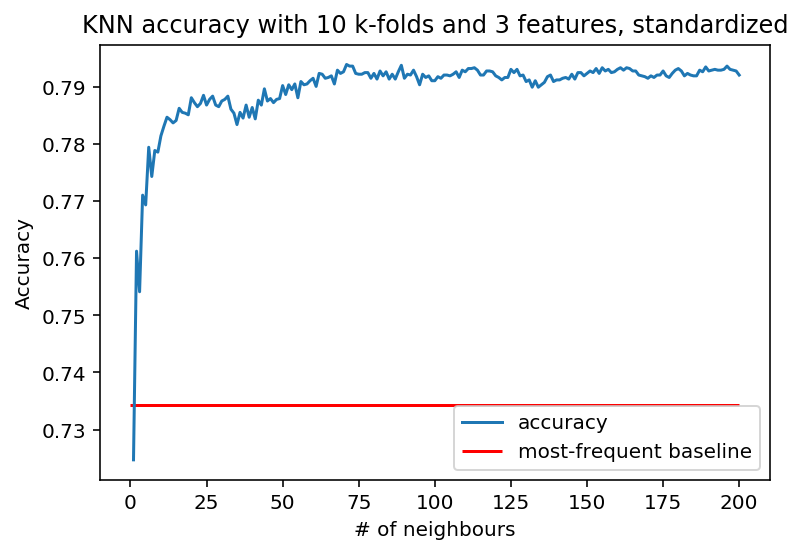

In [355]:
#plot the mean accuracies against k
plt.plot(mean_knn_score_standard.k, mean_knn_score_standard.accuracy)
plt.hlines(mean_dummy_score, xmin = 0, xmax = 200, colors='r', label='most-frequent baseline')
plt.title('KNN accuracy with 10 k-folds and 3 features, standardized')
plt.xlabel('# of neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.gcf().set_size_inches(6,4)
plt.show();

In [356]:
#return the best k (highest accuracy)
print('Best k: ' + str(mean_knn_score_standard['accuracy'].idxmax()+1))
print('Accuracy: ' + str(round(mean_knn_score_standard.accuracy[mean_knn_score_standard['accuracy'].idxmax()],3)))

Best k: 71
Accuracy: 0.794
